In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


In [3]:
spotify = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv',encoding='iso-8859-1')

In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [9]:
spotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [15]:
spotify.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Got the null values per column.

In [16]:
spotify[spotify['key'].isnull()]['key']

12     NaN
17     NaN
22     NaN
35     NaN
44     NaN
      ... 
899    NaN
901    NaN
903    NaN
938    NaN
940    NaN
Name: key, Length: 95, dtype: object

In [19]:
spotify[spotify['in_shazam_charts'].isnull()]['in_shazam_charts']

14     NaN
54     NaN
55     NaN
71     NaN
73     NaN
86     NaN
127    NaN
158    NaN
159    NaN
180    NaN
243    NaN
274    NaN
320    NaN
392    NaN
395    NaN
403    NaN
410    NaN
429    NaN
434    NaN
440    NaN
441    NaN
442    NaN
443    NaN
444    NaN
446    NaN
449    NaN
500    NaN
501    NaN
504    NaN
506    NaN
507    NaN
513    NaN
518    NaN
519    NaN
520    NaN
529    NaN
531    NaN
532    NaN
533    NaN
534    NaN
535    NaN
549    NaN
554    NaN
560    NaN
566    NaN
584    NaN
620    NaN
625    NaN
727    NaN
927    NaN
Name: in_shazam_charts, dtype: object

Null values for columns are stored the same way.

In [18]:
spotify.shape[0]

953

There are 953 rows of data.

In [24]:
# Converting the 'streams' column into integer data type
spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce')

Text(0.5, 1.0, 'Streams Frequency')

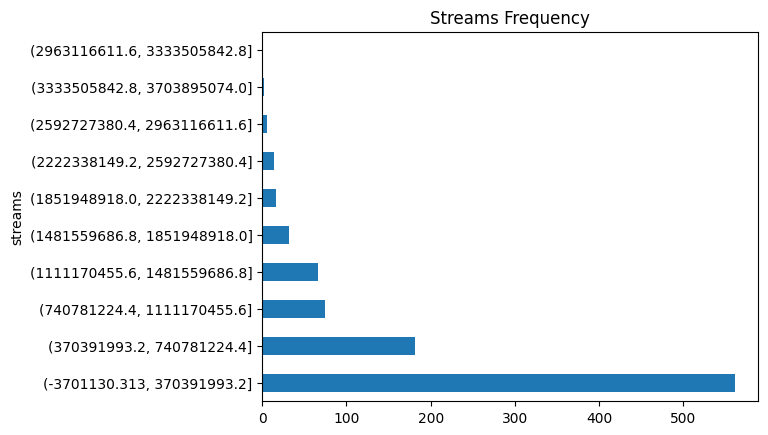

In [64]:
spotify['streams'].value_counts(bins=10).plot.barh()
plt.title('Streams Frequency')

Most streams from the dataset are below 370391993.2; this suggests that the dataset is focused on more recent artists.

(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

Text(0.5, 1.0, '% danceability of more recent songs')

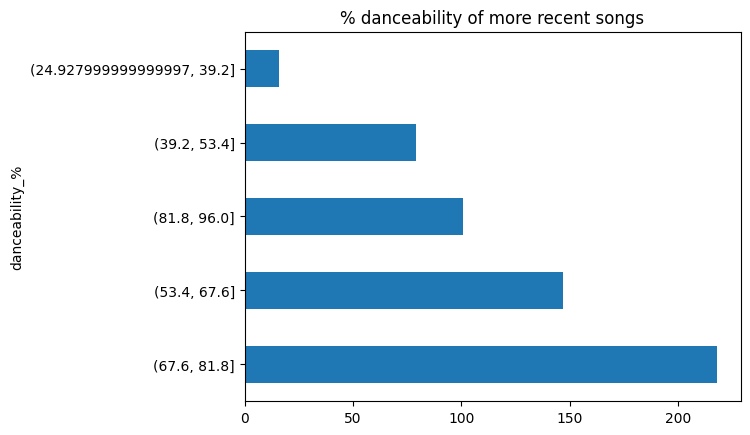

In [66]:
spotify[spotify['streams']<370391993.2]['danceability_%'].value_counts(bins=5).plot.barh()
plt.title('% danceability of more recent songs')

Text(0.5, 1.0, '% danceability of older songs')

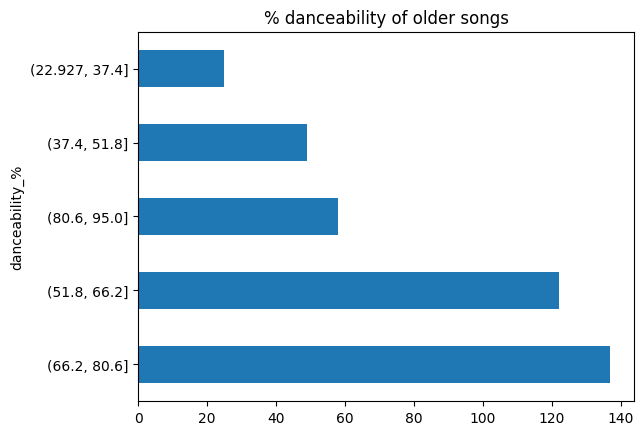

In [65]:
spotify[spotify['streams']>370391993.2]['danceability_%'].value_counts(bins=5).plot.barh()
plt.title('% danceability of older songs')

A larger percentage of the more recent songs are highly danceable.

Text(0.5, 1.0, '% Bpm of more recent songs')

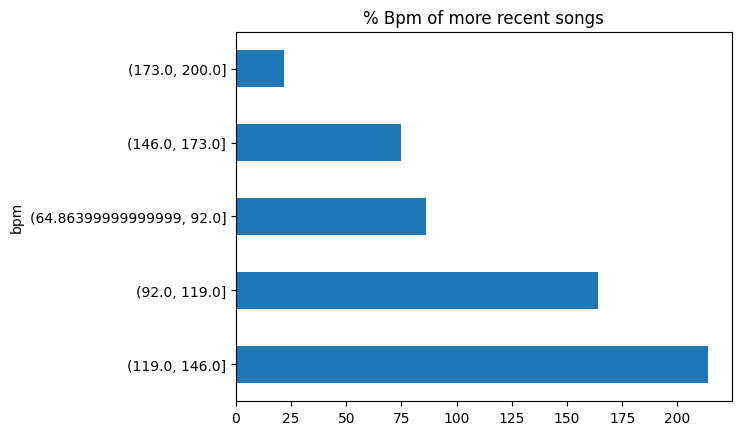

In [68]:
spotify[spotify['streams']<370391993.2]['bpm'].value_counts(bins=5).plot.barh()
plt.title('% Bpm of more recent songs')

Text(0.5, 1.0, '% Bpm of older songs')

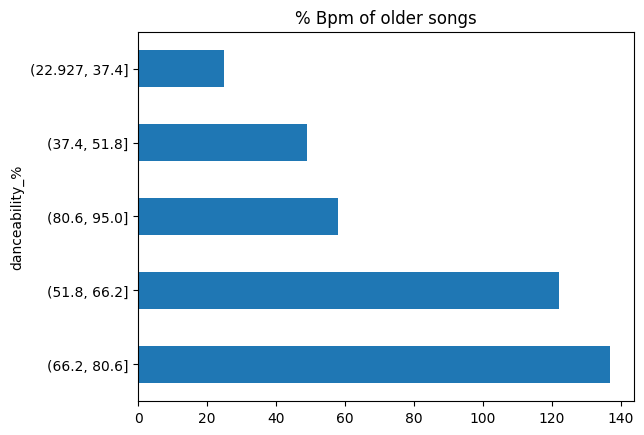

In [69]:
spotify[spotify['streams']>370391993.2]['danceability_%'].value_counts(bins=5).plot.barh()
plt.title('% Bpm of older songs')

In [ ]:
Recent songs have significantly higher bpms.

In [72]:
print('{} is the most recent year.'.format(spotify['released_year'].max()))
print('{} is the oldest year.'.format(spotify['released_year'].min()))

2023 is the most recent year.
1930 is the oldest year.


In [96]:
spotify['released_year'].value_counts()

released_year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: count, dtype: int64

Most of the songs in the dataset are after 2010.

In [98]:
#separating data by year
_2020 = spotify[spotify['released_year']==2020]
_2021 = spotify[spotify['released_year']==2021]
_2022 = spotify[spotify['released_year']==2022]
_2023 = spotify[spotify['released_year']==2023]

In [102]:
_2020['artist(s)_name']

45                            Miley Cyrus
59                           Taylor Swift
71                          Glass Animals
94                              Jung Kook
119                          Taylor Swift
164                            The Weeknd
194                            Hotel Ugly
310             Ariana Grande, The Weeknd
371                            The Weeknd
374                            Fujii Kaze
401                            Conan Gray
411                           Elley Duhï¿
429                            Ed Sheeran
432                                   SZA
433                      Dua Lipa, DaBaby
519                             Lil Nas X
527                        Aitana, zzoilo
548                        Rauw Alejandro
551       THE ANXIETY, Willow, Tyler Cole
555                Bad Bunny, Jhay Cortez
560                           Oliver Tree
566                                   BTS
584                   24kgoldn, Iann Dior
592                         Playbo

In [104]:
_2021['artist(s)_name'].unique()

array(['Justin Bieber, The Kid Laroi', 'Imagine Dragons', 'Peso Pluma',
       'Justin Bieber', 'Taylor Swift', 'Stephen Sanchez', 'Adele',
       'Tory Lanez', 'Ed Sheeran', 'INTERWORLD', 'Nicky Youre, Dazy',
       'Yng Lvcas', 'Imagine Dragons, League of Legends, JID, Arcane',
       'Coldplay, BTS', 'Jack Harlow, Lil Nas X', 'Bad Bunny',
       'Lost Frequencies, Calum Scott', 'Doja Cat', 'SZA',
       'Chencho Corleone, Rauw Alejandro', 'Gayle', 'Cherish, ACRAZE',
       'Adassa, Mauro Castillo, Stephanie Beatriz, Encanto - Cast, Rhenzy Feliz, Diane Guerrero, Carolina Gaitan',
       'Farruko', 'The Weeknd', 'Olivia Rodrigo', 'SZA, Doja Cat',
       'Jessica Darrow', 'Lil Nas X', 'The Weeknd, Post Malone',
       'Julieta Venegas, Bad Bunny, Tainy', 'Lisa', 'Tiï¿½ï¿½sto, Ava',
       'Billie Eilish', 'The Weeknd, Swedish House Mafia',
       'Juan Cruz Toledo, Huilen Toledo', 'BoyWithUke',
       'Xamï¿½ï¿½, Gustah, Neo B', 'Emmy Meli',
       'Justin Quiles, Lenny Tavï¿½ï¿½rez, B

In [105]:
_2020.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

<Axes: xlabel='released_year', ylabel='energy_%'>

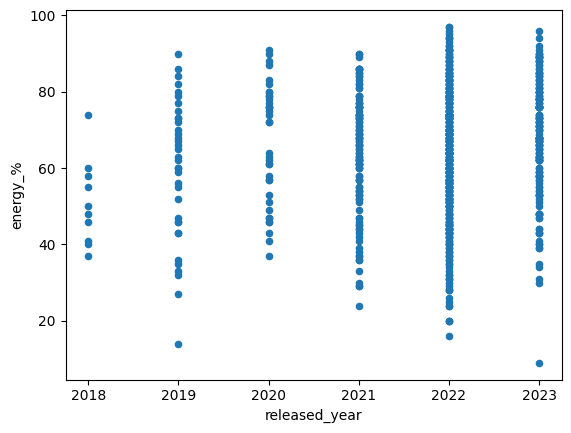

In [111]:
spotify[spotify['released_year']>2017].plot.scatter(x='released_year',y='energy_%')

<Axes: xlabel='released_year', ylabel='instrumentalness_%'>

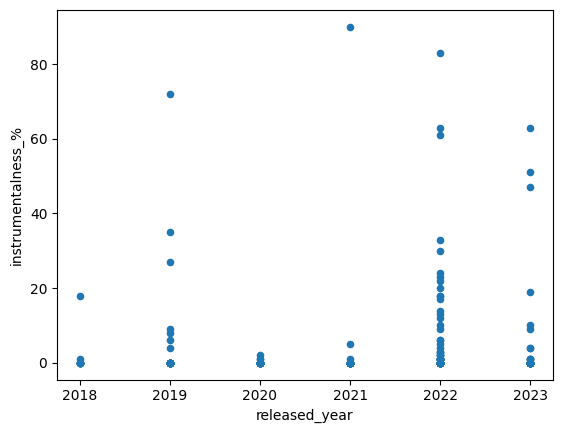

In [112]:
spotify[spotify['released_year']>2017].plot.scatter(x='released_year',y='instrumentalness_%')

<Axes: xlabel='released_year', ylabel='liveness_%'>

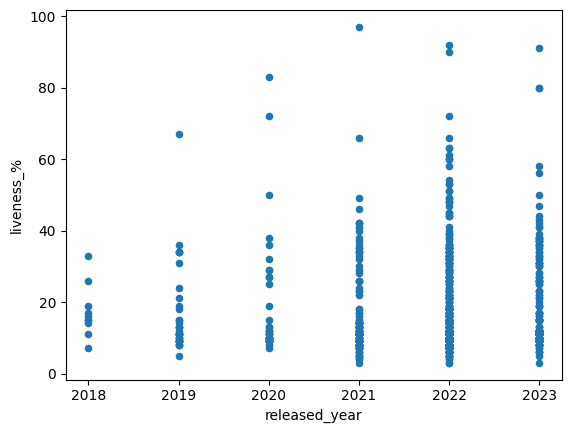

In [113]:
spotify[spotify['released_year']>2017].plot.scatter(x='released_year',y='liveness_%')

<Axes: xlabel='released_year', ylabel='speechiness_%'>

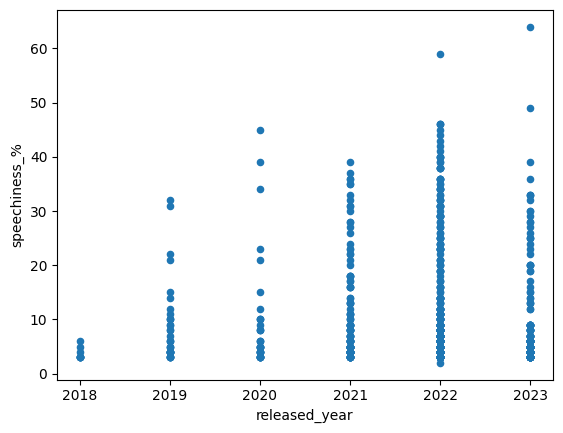

In [114]:
spotify[spotify['released_year']>2017].plot.scatter(x='released_year',y='speechiness_%')

the year 2022 has the highest average stats in the graphs drawn above.

In [116]:
spotify[spotify['released_year']>2017]['released_month'].value_counts()

released_month
5     119
3      80
6      78
12     68
1      64
4      61
10     60
2      57
11     56
7      54
9      45
8      37
Name: count, dtype: int64

The fewest songs are released in the summer.

In [122]:
spotify[(spotify['released_year']>2017)&(spotify['released_month'].isin([8,9]))]['artist(s)_name']

3                                           Taylor Swift
42                              Bebe Rexha, David Guetta
77                                 Sam Smith, Kim Petras
125                                                 Feid
187                                          Post Malone
                             ...                        
916                                                 Feid
920    Fran C, Polima WestCoast, Nickoog Clk, Pablito...
925                                           Ed Sheeran
926                                            BLACKPINK
929                                 Luciano, Aitch, Bï¿½
Name: artist(s)_name, Length: 82, dtype: object

some noteable names like; Taylor Swift, Ed Sheeran, BLACKPINK, Post Malone could be the cause for fewer songs in the summer. This is because these artists have a larger fan base and could draw attention away from others if they do decide to release at the same time.